In [1]:
"""from google.colab import files
files.upload()
"""

'from google.colab import files\nfiles.upload()\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from palettable.colorbrewer.qualitative import Pastel1_7
from palettable.colorbrewer.qualitative import Pastel1_3_r
from palettable.colorbrewer.qualitative import Pastel1_9_r
from palettable.colorbrewer.qualitative import Pastel2_8

from wordcloud import WordCloud

import re
import string
import nltk 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score,roc_auc_score
from sklearn.model_selection import KFold, cross_val_score,cross_val_predict, GridSearchCV,train_test_split
from sklearn.metrics import roc_curve, auc

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shadow\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shadow\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shadow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df=pd.read_csv("Resume_data.csv")

In [4]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df

,text,job_role
0,PeopleSoft Administration\n \nVivekanand Sayan...,Peoplesoft_DBA_Admin
1,\n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...,Consultant
2,RAJU PAVANA KUMARI\n\n\nProfessional Summary:...,SQL_Developer
3,\n\nCAREER OBJECTIVE\t\t\n\nPursuing Peopleso...,Peoplesoft_DBA_Admin
4,\tWorkday Integration Consultant\n\nName ...,Consultant
...,...,...
74,Maryala Vinay Reddy\n\nProfessional Summary:\t...,react_dev
75,Hari Krishna M\n\n\nSummary:\nA result oriente...,Consultant
76,KAMBALA SAI SURENDRA \n \n\tMandepeta \t \n ...,react_dev
77,Rahul Ahuja\n---------------------------------...,Peoplesoft_DBA_Admin


In [5]:
df["tokens"]=df["text"].apply(word_tokenize)
df["tokens"]=df["tokens"].apply(tuple)
duplicate_rows=df[df.duplicated(subset="tokens")]
duplicate_rows

,text,job_role,tokens
19,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,react_dev,"(MAREEDU, LOKESH, BABU, PROFESSIONAL, OVERVIEW..."
69,\nUi-Developer/ React JS Developer \nNAME: KRI...,react_dev,"(Ui-Developer/, React, JS, Developer, NAME, :,..."


In [6]:
df.drop_duplicates(subset="tokens",inplace=True)
df.shape

(77, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 78
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      77 non-null     object
 1   job_role  77 non-null     object
 2   tokens    77 non-null     object
dtypes: object(3)
memory usage: 2.4+ KB


In [8]:
temp= df.groupby('job_role').count()["text"].reset_index().sort_values(by="text",ascending=False)
temp.style.background_gradient(cmap="Blues")

,job_role,text
3,react_dev,22
0,Consultant,21
1,Peoplesoft_DBA_Admin,20
2,SQL_Developer,14


In [9]:
fig= go.Figure(go.Funnelarea(
    text=temp.job_role,
    values=temp.text,
    title={"position":"top center","text":"Funnel Chart of job role"}))

fig.show()

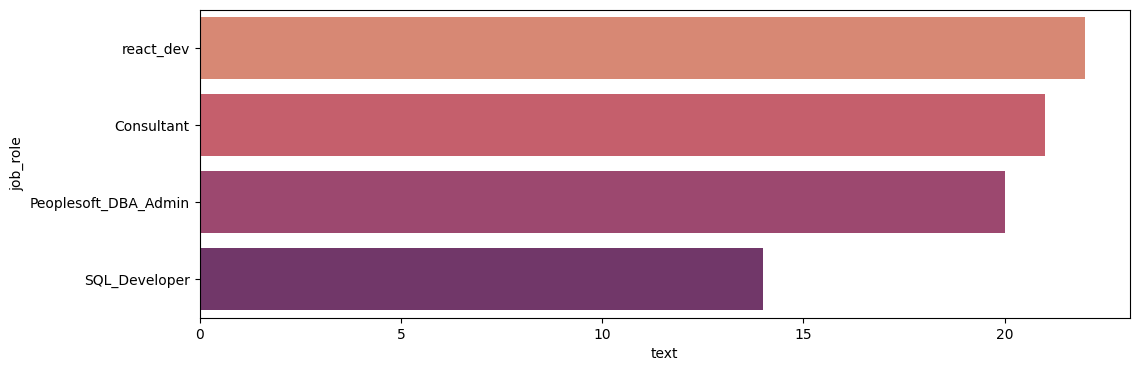

In [10]:
plt.figure(figsize=(12,4))
sns.barplot(x=temp['text'], y=temp['job_role'], palette='flare')
plt.show()

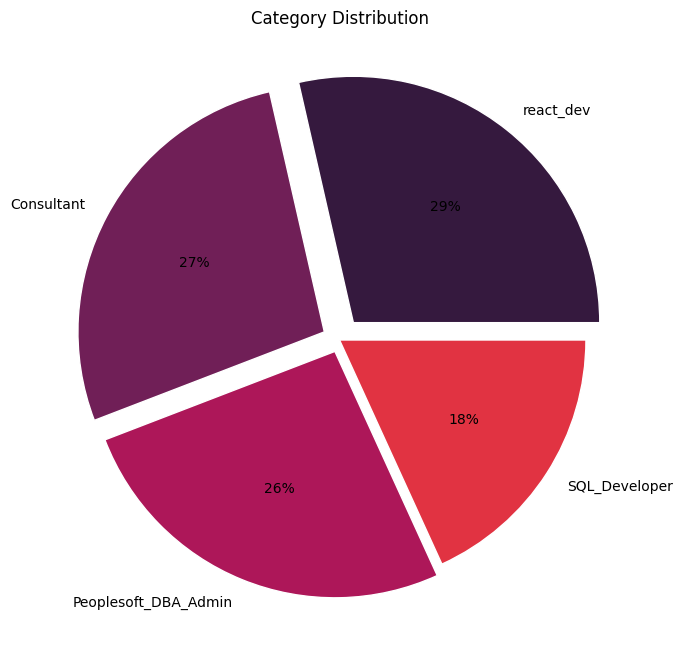

In [11]:
plt.figure(figsize=(12,8))
plt.pie(temp['text'], labels=temp['job_role'],explode = (0.09, 0.07, 0.05, 0),
        colors=sns.color_palette('rocket'), autopct='%.0f%%',wedgeprops={"edgecolor":"white","linewidth":1,'antialiased': True})
plt.title('Category Distribution')
plt.show()


In [12]:
df["number_of_words"]=df["text"].apply(lambda x: len(str(x).split()))
df.head()

,text,job_role,tokens,number_of_words
0,PeopleSoft Administration\n \nVivekanand Sayan...,Peoplesoft_DBA_Admin,"(PeopleSoft, Administration, Vivekanand, Sayan...",2034
1,\n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...,Consultant,"(JYOTI, VERMA, 3, years, of, Experience, in, W...",465
2,RAJU PAVANA KUMARI\n\n\nProfessional Summary:...,SQL_Developer,"(RAJU, PAVANA, KUMARI, Professional, Summary, ...",530
3,\n\nCAREER OBJECTIVE\t\t\n\nPursuing Peopleso...,Peoplesoft_DBA_Admin,"(CAREER, OBJECTIVE, Pursuing, Peoplesoft, Exec...",515
4,\tWorkday Integration Consultant\n\nName ...,Consultant,"(Workday, Integration, Consultant, Name, :, Sr...",875


C:\Users\Shadow\AppData\Local\Temp\ipykernel_19792\4077129928.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Kernel Distribution of Number of Words')

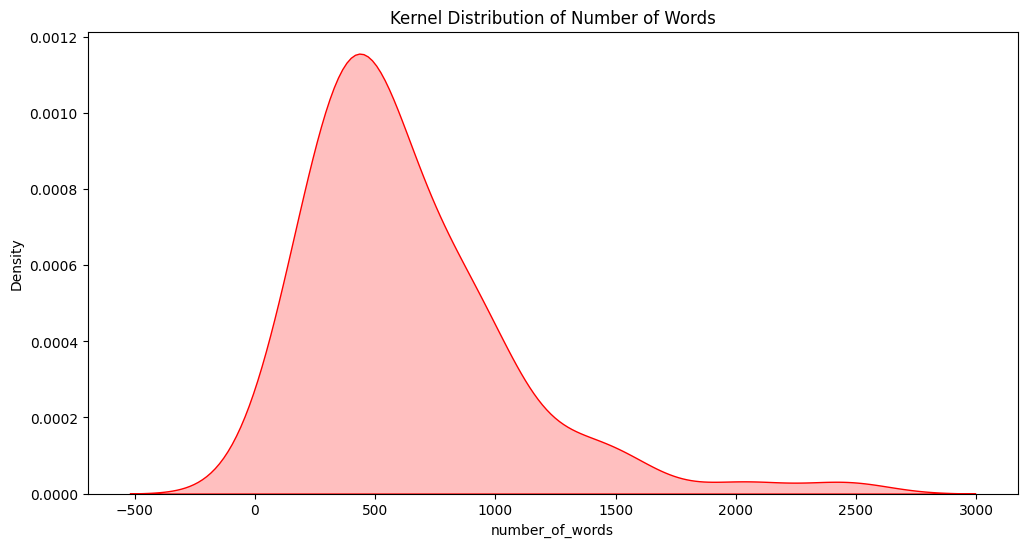

In [13]:
plt.figure(figsize=(12,6))
sns.kdeplot(df["number_of_words"],shade=True,color="r").set_title("Kernel Distribution of Number of Words")

C:\Users\Shadow\AppData\Local\Temp\ipykernel_19792\3334139238.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Shadow\AppData\Local\Temp\ipykernel_19792\3334139238.py:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Shadow\AppData\Local\Temp\ipykernel_19792\3334139238.py:7: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\Shadow\AppData\Local\Temp\ipykernel_19792\3334139238.py:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




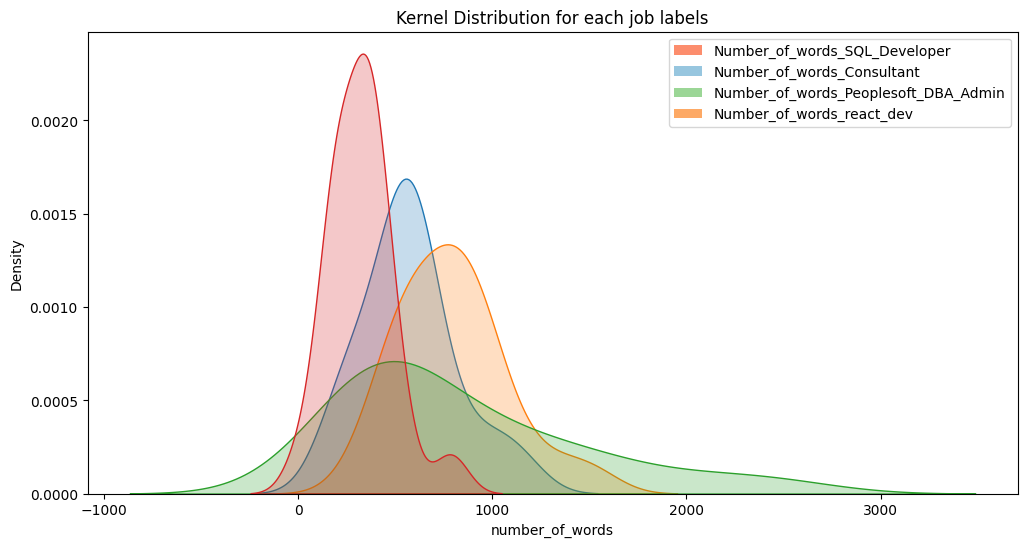

In [14]:
plt.figure(figsize=(12,6))
sns.kdeplot(df[df["job_role"]=="SQL_Developer"]["number_of_words"],shade=True,
            cmap="Reds").set_title("Kernel Distribution for each job labels")

sns.kdeplot(df[df["job_role"]=="Consultant"]["number_of_words"],shade=True,cmap="Blues")

sns.kdeplot(df[df["job_role"]=="Peoplesoft_DBA_Admin"]["number_of_words"],shade=True,cmap="Greens")

sns.kdeplot(df[df["job_role"]=="react_dev"]["number_of_words"],shade=True,cmap="Oranges")


handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Number_of_words_SQL_Developer"),
           mpatches.Patch(facecolor=plt.cm.Blues(100), label="Number_of_words_Consultant"),
          mpatches.Patch(facecolor=plt.cm.Greens(100),label="Number_of_words_Peoplesoft_DBA_Admin"),
          mpatches.Patch(facecolor=plt.cm.Oranges(100),label="Number_of_words_react_dev")]
plt.legend(handles=handles)

#plt.legend()
# plt.show()

In [15]:
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()

stopwords = stopwords.words('english')

def clean_text(text):
    text = text.lower() # Convert text to lowercase
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)   # remove RT and cc
    text = re.sub('#\S+', '', text)      # remove hashtags
    text = re.sub('@\S+', ' ', text)      # remove mentions
    text = re.sub(r'[^\x00-\x7f]',r' ', text)     #replace consecutive non-ASCII characters with a space
    text = re.sub('\s+', ' ', text) 
    text = "".join([word for word in text if word not in string.punctuation]) #punctuations removal
    text = re.sub("\d+", " ", text) #remove digits
    text = ' '.join([word for word in text.split() if word not in stopwords])     #stopwords removal
    return text.strip()

df['cleaned_text'] = df['text'].apply(lambda x: clean_text(x))


In [16]:
def lemmatize_words(text):
  words = text.split()
  words = [lemmatizer.lemmatize(word,pos='v') for word in words]
  return ' '.join(words)
df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_words)

In [17]:
df["cleaned_text"]


0     peoplesoft administration vivekanand sayana ca...
1     jyoti verma years experience workday functiona...
2     raju pavana kumari professional summary years ...
3     career objective pursue peoplesoft executive r...
4     workday integration consultant name sri krishn...
                            ...                        
74    maryala vinay reddy professional summary years...
75    hari krishna summary result orient professiona...
76    kambala sai surendra mandepeta summary project...
77    rahul ahuja summary years experience peoplesof...
78    vinay kumar v workday functional consultant ex...
Name: cleaned_text, Length: 77, dtype: object

In [18]:
for i in df["cleaned_text"]:
  print(i)

peoplesoft administration vivekanand sayana career objective valid expertise years peoplesoft hope enhance skill set add value business enable implementation solutions aid company objectives understand anticipate need interest motivations clients deliver time budget quality deliver value improve agility quality reliability professional summary years experience peoplesoft implementation support configuration migrations maintenance administration application server domains process scheduler servers web server domains peopletools upgrade application update pum ses elastic search experience integration activities various peoplesoft financials hrms epm fscm environments extensively involve resolve performance issue experience drive infrastructure hardware upgrade disaster recovery activities experience health check peoplesoft environments experience peoplesoft database refresh production development test environments experience performance tune application servers web servers perform full l

In [19]:
df["temp_list"]=df["cleaned_text"].apply(lambda x: str(x).split())
top= Counter([item for sublist in df["temp_list"] for item in sublist])
temp=pd.DataFrame(top.most_common(15))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap="Blues")

,Common_words,count
0,experience,596
1,report,525
2,use,456
3,work,441
4,peoplesoft,385
5,workday,364
6,application,363
7,create,344
8,server,319
9,project,315


In [20]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [21]:
sql_dev=df[df["job_role"]=="SQL_Developer"]
consultant=df[df["job_role"]=="Consultant"]
peoplesoft=df[df["job_role"]=="Peoplesoft_DBA_Admin"]
react_dev=df[df["job_role"]=="react_dev"]

In [22]:
top=Counter([item for sublist in sql_dev["temp_list"] for item in sublist])
temp_sql = pd.DataFrame(top.most_common(15))
temp_sql.columns = ['Common_words','count']
temp_sql.style.background_gradient(cmap='Reds')


,Common_words,count
0,sql,168
1,data,111
2,experience,100
3,use,98
4,server,93
5,report,86
6,table,75
7,create,65
8,function,60
9,query,57


In [23]:
fig=px.treemap(temp_sql,path=["Common_words"],values="count",title="Tree map for most common words in SQL_DEV")
fig.show()

In [24]:
top=Counter([item for sublist in peoplesoft["temp_list"] for item in sublist])
temp_peoplesoft = pd.DataFrame(top.most_common(15))
temp_peoplesoft.columns = ['Common_words','count']
temp_peoplesoft.style.background_gradient(cmap='Reds')


,Common_words,count
0,peoplesoft,361
1,application,279
2,experience,242
3,server,223
4,database,148
5,process,147
6,servers,146
7,report,123
8,project,117
9,work,112


In [25]:
fig=px.treemap(temp_peoplesoft,path=["Common_words"],values="count",title="Tree map for most common words in Peoplesoft_DBA_Admin")
fig.show()

In [26]:
top=Counter([item for sublist in consultant["temp_list"] for item in sublist])
temp_consultant = pd.DataFrame(top.most_common(15))
temp_consultant.columns = ['Common_words','count']
temp_consultant.style.background_gradient(cmap='Greens')


,Common_words,count
0,workday,364
1,report,311
2,work,222
3,create,182
4,experience,179
5,integrations,175
6,business,173
7,use,169
8,test,135
9,process,122


In [27]:
fig=px.treemap(temp_consultant,path=["Common_words"],values="count",title="Tree map for most common words in workday_consultant")
fig.show()

In [28]:
top=Counter([item for sublist in react_dev["temp_list"] for item in sublist])
temp_react_dev = pd.DataFrame(top.most_common(15))
temp_react_dev.columns = ['Common_words','count']
temp_react_dev.style.background_gradient(cmap='Purples')


,Common_words,count
0,use,99
1,experience,75
2,react,74
3,project,68
4,work,63
5,js,60
6,html,57
7,design,54
8,knowledge,53
9,css,49


In [29]:
fig=px.treemap(temp_react_dev,path=["Common_words"],values="count",title="Tree map for most common words in React Developer")
fig.show()

In [30]:
raw_text = [word for word_list in df['temp_list'] for word in word_list]

In [31]:
def words_unique(job_role,numwords,raw_words):
    all_other_words = []
    for item in df[df["job_role"] != job_role]['temp_list']:
        for word in item:
            all_other_words .append(word)
    all_other_words  = list(set(all_other_words ))
    
    specific_word_only = [x for x in raw_text if x not in all_other_words]
    
    my_counter = Counter()
    
    for item in df[df.job_role == job_role]['temp_list']:
        for word in item:
            my_counter[word] += 1
    keep = list(specific_word_only)
    for word in list(my_counter):
        if word not in keep:
            del my_counter[word]
    
    Unique_words = pd.DataFrame(my_counter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [32]:
Unique_sql= words_unique('SQL_Developer', 15, raw_text)
Unique_sql.style.background_gradient(cmap='Greens')

,words,count
0,ssis,29
1,trigger,27
2,tsql,16
3,cte,13
4,constraints,13
5,ssrs,13
6,retail,13
7,plsql,12
8,operators,10
9,intelligence,10


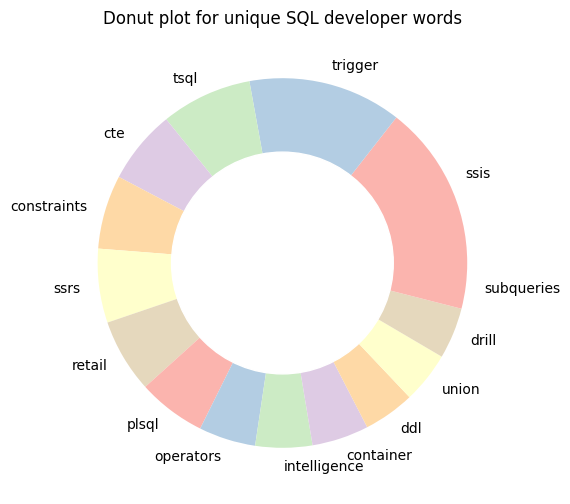

In [33]:
plt.figure(figsize=(10,6))
circle=plt.Circle((0,0),0.6,color="white")
plt.pie(Unique_sql["count"],labels=Unique_sql.words,colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Donut plot for unique SQL developer words")
plt.show()

In [34]:
df.job_role.unique()

array(['Peoplesoft_DBA_Admin', 'Consultant', 'SQL_Developer', 'react_dev'],
      dtype=object)

In [35]:
Unique_peoplesoft= words_unique('Peoplesoft_DBA_Admin', 15, raw_text)
Unique_peoplesoft.style.background_gradient(cmap='autumn')

,words,count
0,patch,71
1,pum,50
2,peopletools,47
3,tuxedo,42
4,bundle,35
5,compare,33
6,weblogic,31
7,pia,30
8,tax,25
9,mover,23


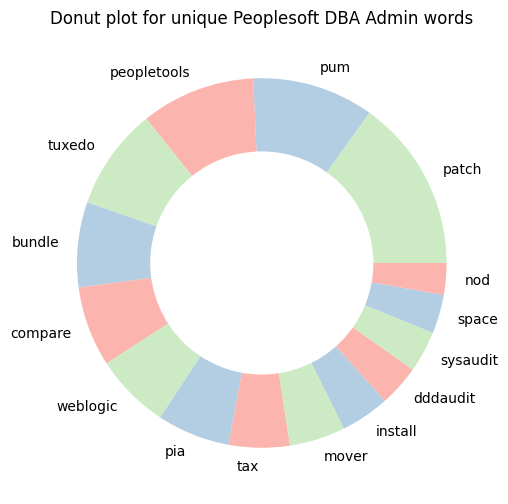

In [36]:
plt.figure(figsize=(10,6))
circle=plt.Circle((0,0),0.6,color="white")
plt.pie(Unique_peoplesoft["count"],labels=Unique_peoplesoft.words,colors=Pastel1_3_r.hex_colors)
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Donut plot for unique Peoplesoft DBA Admin words")
plt.show()

In [37]:
Unique_con= words_unique('Consultant', 15, raw_text)
Unique_con.style.background_gradient(cmap='bone')

,words,count
0,workday,364
1,integrations,175
2,eib,111
3,calculate,66
4,xslt,60
5,connectors,47
6,connector,46
7,payroll,46
8,writer,44
9,outbound,38


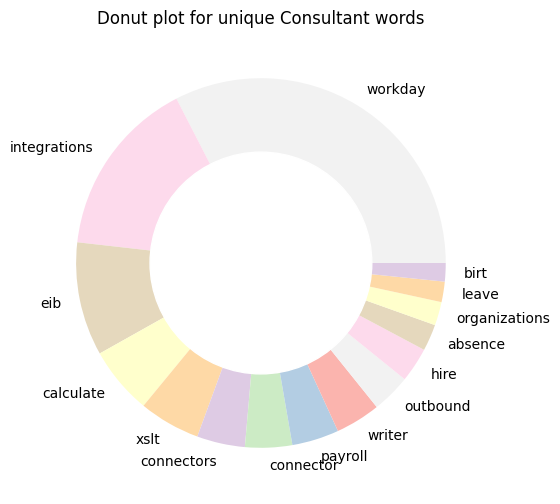

In [38]:
plt.figure(figsize=(10,6))
circle=plt.Circle((0,0),0.6,color="white")
plt.pie(Unique_con["count"],labels=Unique_con.words,colors=Pastel1_9_r.hex_colors)
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Donut plot for unique Consultant words")
plt.show()

In [39]:
Unique_react_dev= words_unique('react_dev', 15, raw_text)
Unique_react_dev.style.background_gradient(cmap='copper')

,words,count
0,react,74
1,js,60
2,css,49
3,javascript,42
4,bootstrap,27
5,reactjs,27
6,jquery,15
7,redux,14
8,front,10
9,responsive,9


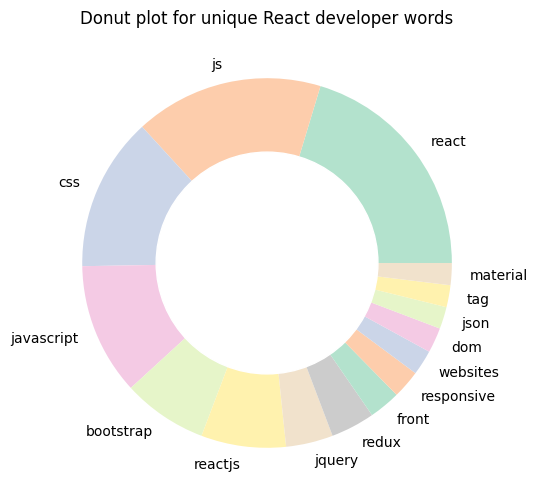

In [40]:
plt.figure(figsize=(10,6))
circle=plt.Circle((0,0),0.6,color="white")
plt.pie(Unique_react_dev["count"],labels=Unique_react_dev.words,colors=Pastel2_8.hex_colors)
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("Donut plot for unique React developer words")
plt.show()

In [41]:
def plot_word_cloud(text):
  # Combine all the text data into a single string
  text = ' '.join(text)
  # Create the word cloud
  wordcloud = WordCloud(width=800, height=800,max_words=50, background_color='white', 
                      min_font_size=10, max_font_size=200).generate(text)

  # Display the word cloud using matplotlib
  plt.figure(figsize=(8, 8), facecolor=None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()


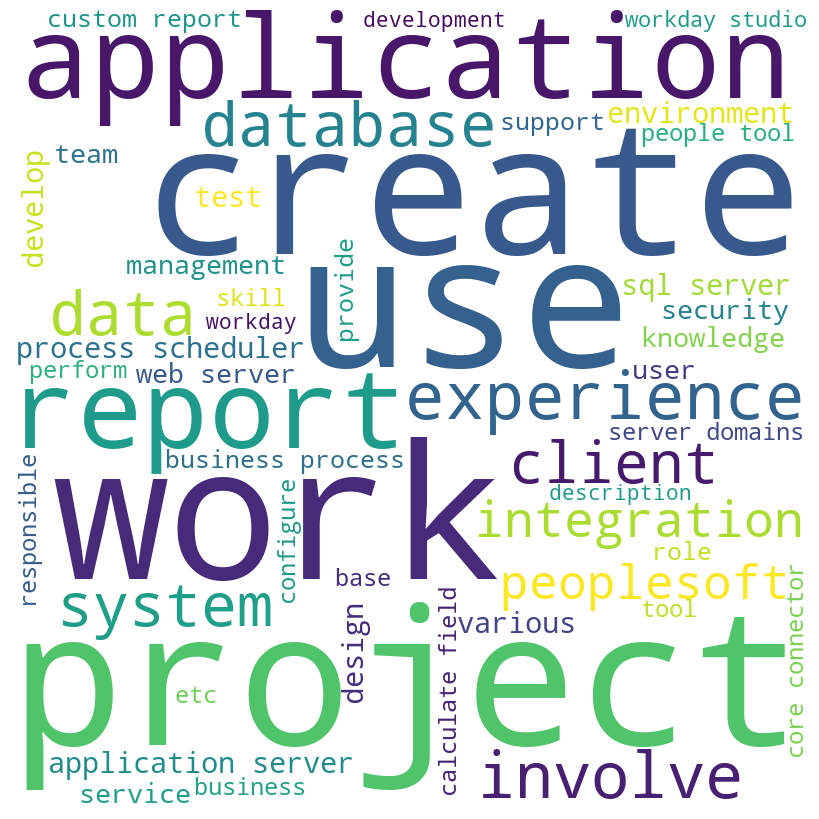

In [42]:
plot_word_cloud(df["cleaned_text"])

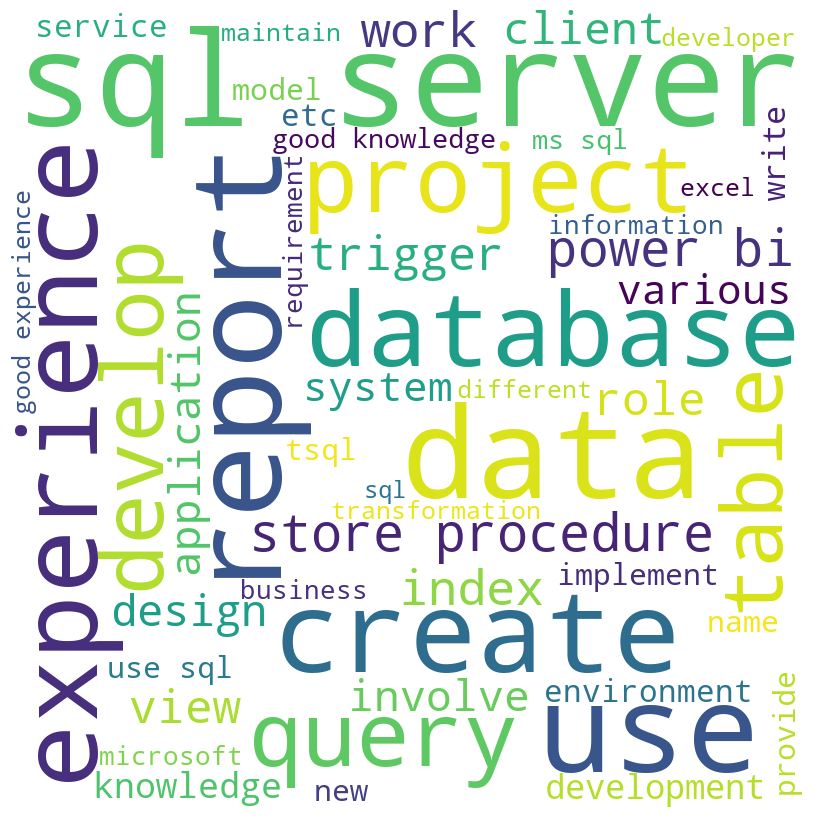

In [43]:
plot_word_cloud(sql_dev["cleaned_text"])

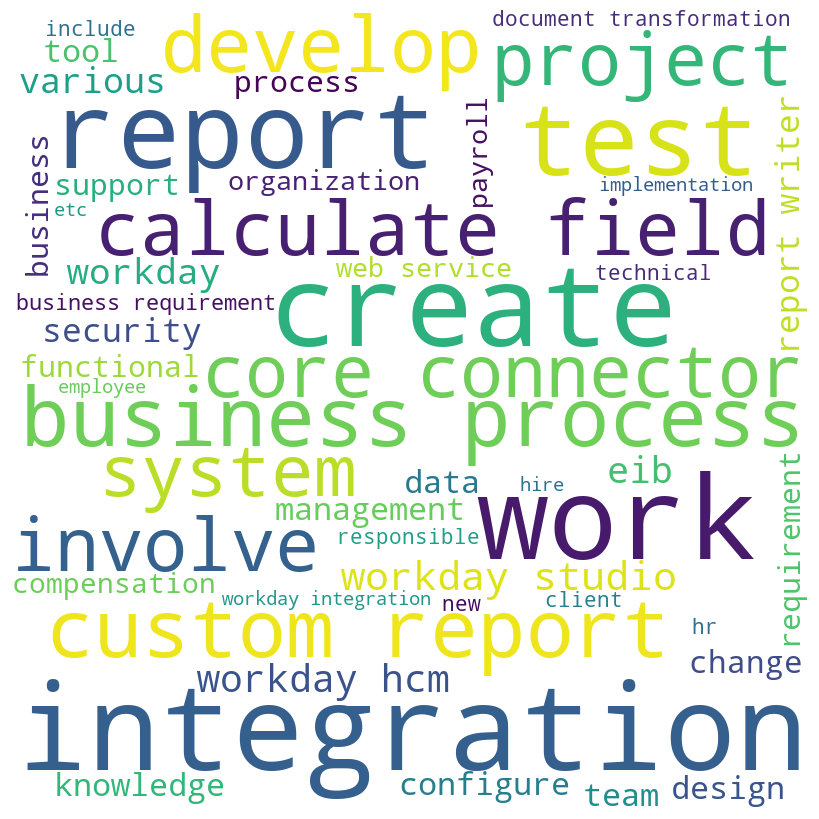

In [44]:
plot_word_cloud(consultant["cleaned_text"])

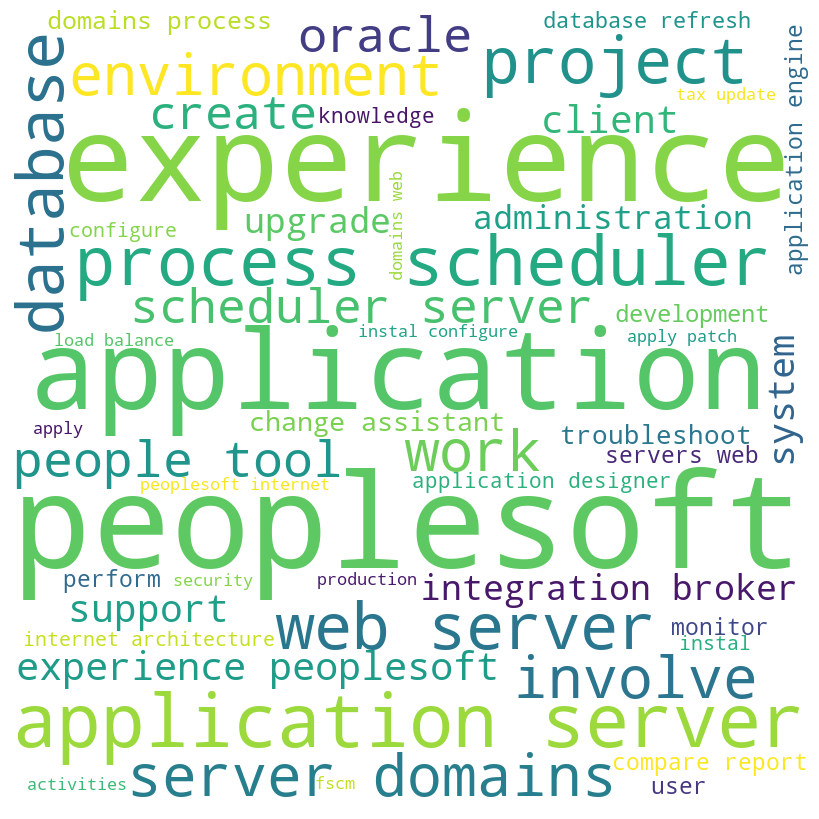

In [45]:
plot_word_cloud(peoplesoft["cleaned_text"])

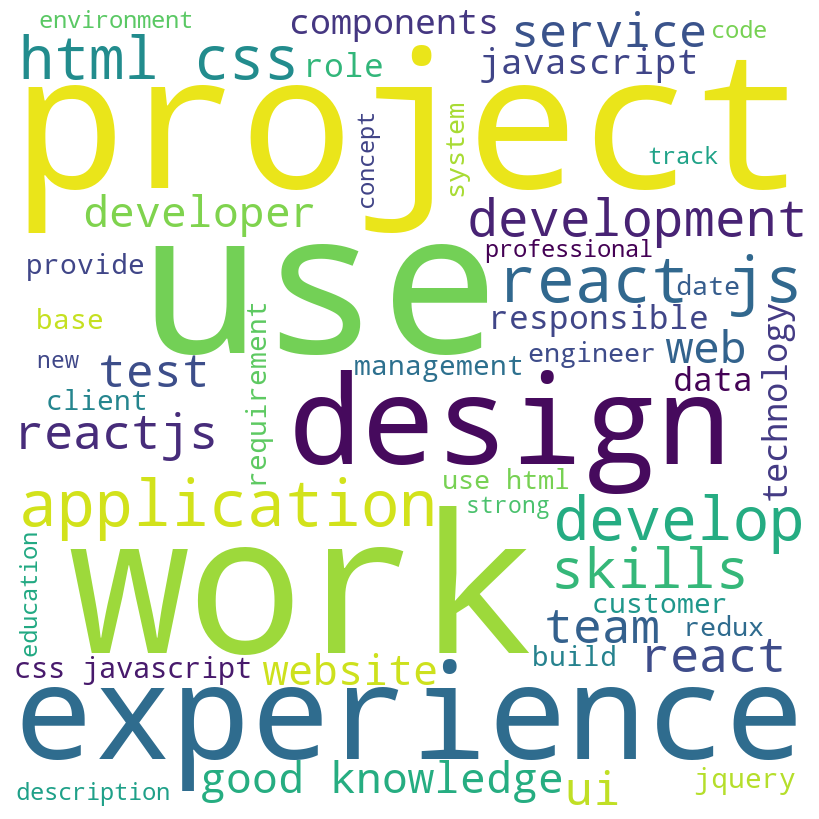

In [46]:
plot_word_cloud(react_dev["cleaned_text"])

# Feature Extraction

In [47]:
stpwrd = nltk.corpus.stopwords.words('english')
new_stopwords = ["use","change","development","change","hcm","skills", "performance","different","function","per","responsible","maintenance",
                 "experience","like","team","client", "project","good","consultant","roles","patch","understand","environments","users","level",
                 "configuration","activities","check","tool","service","work","develop","design","knowledge","base","upgrade","summary",
                 "create","test","report","business","application","etc","web","systems","software","servers",
                 "process","support","involve","issue","people","technical","various","'configure","production","maintain","security","responsibilities",
                 "environment","configure","management","data","domains","eib","table","scheduler","system","monitor","till","instal",
                 "custom","apply","field","studio","document","requirements","new","date","query","applications","file","professional",
                 "developer","role","perform","core","server","integrations","load","years","update","provide","build","requirement","engineer",
                 "user","windows","troubleshoot","object","information","job","technologies","code","profile","setup","functional","implement","calculate",
                 "technology","implementation","include","refresh","xml","xslt","write","detail","solutions","compensation","description"]
stpwrd.extend(new_stopwords)
def remove_extra_stopwords(text):
  text = ' '.join([word for word in text.split() if word not in stpwrd])     #stopwords removal
  return text.strip()

df['cleaned_text'] = df['cleaned_text'].apply(lambda x: remove_extra_stopwords(x))


In [48]:
df["temp_list"]=df["cleaned_text"].apply(lambda x: str(x).split())
top= Counter([item for sublist in df["temp_list"] for item in sublist])
temp=pd.DataFrame(top.most_common(15))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap="Blues")

,Common_words,count
0,peoplesoft,385
1,workday,364
2,database,212
3,sql,203
4,integration,166
5,oracle,116
6,react,74
7,fscm,65
8,js,60
9,html,58


In [49]:
vectorize_n_gram_feature = TfidfVectorizer(norm="l2",analyzer="word",ngram_range=(1,3),max_features=10)
tfidf_matrix_feature=vectorize_n_gram_feature.fit_transform(df["cleaned_text"].values)
tfidf_matrix_feature

<77x10 sparse matrix of type '<class 'numpy.float64'>'
	with 238 stored elements in Compressed Sparse Row format>

In [50]:
dict(itertools.islice(vectorize_n_gram_feature.vocabulary_.items(), 100))

{'peoplesoft': 6,
 'integration': 3,
 'fscm': 1,
 'database': 0,
 'oracle': 5,
 'workday': 9,
 'sql': 8,
 'html': 2,
 'react': 7,
 'js': 4}

In [51]:
le=LabelEncoder()
label_job_role=le.fit_transform(df["job_role"])
label_job_role

array([1, 0, 2, 1, 0, 3, 2, 2, 3, 1, 2, 3, 3, 3, 3, 3, 3, 1, 3, 2, 2, 0,
       2, 0, 0, 1, 3, 1, 1, 3, 0, 1, 2, 0, 2, 3, 0, 2, 1, 3, 1, 0, 0, 2,
       0, 1, 0, 1, 2, 1, 2, 1, 3, 0, 3, 1, 3, 0, 3, 2, 1, 1, 0, 3, 0, 0,
       3, 0, 3, 0, 1, 1, 3, 0, 3, 1, 0])

In [52]:
x=tfidf_matrix_feature
y=label_job_role

## Logistic Regression

In [53]:
kfold=KFold(n_splits=10)
logistic_model=LogisticRegression(penalty="l2",max_iter=1000)
logistic_model_result=cross_val_score(logistic_model,x,y,cv=kfold)
logistic_accuacy_mean=logistic_model_result.mean()
print(f"The mean of logistic regession is, {logistic_accuacy_mean}")
logistic_prediction=cross_val_predict(logistic_model,x,y,cv=kfold)
print("The confusion matrix for logistic regression:\n",confusion_matrix(y,logistic_prediction))
logistic_accuracy=accuracy_score(y,logistic_prediction)
print("The accuracy of the logistic regression",logistic_accuracy)
print("The Classification report of logistic regression\n",classification_report(y,logistic_prediction))
logistic_f1=f1_score(y,logistic_prediction,average="macro")
print("The F1 score for logitic regression: ",logistic_f1)

The mean of logistic regession is, 0.9875
The confusion matrix for logistic regression:
 [[21  0  0  0]
 [ 0 20  0  0]
 [ 0  0 14  0]
 [ 0  0  1 21]]
The accuracy of the logistic regression 0.987012987012987
The Classification report of logistic regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        20
           2       0.93      1.00      0.97        14
           3       1.00      0.95      0.98        22

    accuracy                           0.99        77
   macro avg       0.98      0.99      0.99        77
weighted avg       0.99      0.99      0.99        77

The F1 score for logitic regression:  0.9855653568564555


## Naive Bayes

In [54]:
nb_model=MultinomialNB()
nb_model_result=cross_val_score(nb_model, x, y, cv=kfold)
nb_accuracy_mean=nb_model_result.mean()
print("The mean of Multinomial NB is ",nb_accuracy_mean)
nb_prediction=cross_val_predict(nb_model,x,y,cv=kfold)
print("The confusion matrix of Multinomial NB is \n",confusion_matrix(y,nb_prediction))

NB_accuracy=accuracy_score(y,nb_prediction)
print("The accuracy of the Multinomial NB",NB_accuracy)
print("The Classification report of Multinomial NB\n",classification_report(y,nb_prediction))
NB_f1=f1_score(y,nb_prediction,average="macro")
print("The F1 score for Multinomial NB: ",NB_f1)

The mean of Multinomial NB is  0.9607142857142857
The confusion matrix of Multinomial NB is 
 [[21  0  0  0]
 [ 0 20  0  0]
 [ 0  0 14  0]
 [ 1  1  1 19]]
The accuracy of the Multinomial NB 0.961038961038961
The Classification report of Multinomial NB
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.95      1.00      0.98        20
           2       0.93      1.00      0.97        14
           3       1.00      0.86      0.93        22

    accuracy                           0.96        77
   macro avg       0.96      0.97      0.96        77
weighted avg       0.96      0.96      0.96        77

The F1 score for Multinomial NB:  0.9611751129540165


## Decision Tree

In [55]:
DT_model=DecisionTreeClassifier(criterion="gini",max_depth=3)
DT_model_result=cross_val_score(DT_model, x, y, cv=kfold)
DT_accuracy_mean=DT_model_result.mean()
print("The mean of Decision Tree is ",DT_accuracy_mean)
DT_prediction=cross_val_predict(DT_model,x,y,cv=kfold)
print("The confusion matrix of Decision Tree is \n",confusion_matrix(y,DT_prediction))
DT_accuracy=accuracy_score(y,DT_prediction)
print("The accuracy of the Decision Tree",DT_accuracy)
print("The Classification report of Decision Tree\n",classification_report(y,DT_prediction))
DT_f1=f1_score(y,DT_prediction,average="macro")
print("The F1 score for Decision Tree: ",DT_f1)

The mean of Decision Tree is  0.9625
The confusion matrix of Decision Tree is 
 [[21  0  0  0]
 [ 0 20  0  0]
 [ 0  0 13  1]
 [ 0  0  2 20]]
The accuracy of the Decision Tree 0.961038961038961
The Classification report of Decision Tree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        20
           2       0.87      0.93      0.90        14
           3       0.95      0.91      0.93        22

    accuracy                           0.96        77
   macro avg       0.95      0.96      0.96        77
weighted avg       0.96      0.96      0.96        77

The F1 score for Decision Tree:  0.9566960705693665


## Random Forest

In [56]:
RT_model=RandomForestClassifier(n_estimators=200,criterion="gini",max_depth=5)
RT_model_result=cross_val_score(RT_model, x, y, cv=kfold)
RT_accuracy_mean=DT_model_result.mean()
print("The mean of Random Forest is ",RT_accuracy_mean)
RT_prediction=cross_val_predict(RT_model,x,y,cv=kfold)
print("The confusion matrix of Random Forest is \n",confusion_matrix(y,RT_prediction))
RT_accuracy=accuracy_score(y,RT_prediction)
print("The accuracy of the Random Forest",RT_accuracy)
print("The Classification report of Random Forest\n",classification_report(y,RT_prediction))
RT_f1=f1_score(y,RT_prediction,average="macro")
print("The F1 score for DRandom Forest: ",RT_f1)

The mean of Random Forest is  0.9625
The confusion matrix of Random Forest is 
 [[21  0  0  0]
 [ 0 20  0  0]
 [ 0  0 14  0]
 [ 0  0  1 21]]
The accuracy of the Random Forest 0.987012987012987
The Classification report of Random Forest
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        20
           2       0.93      1.00      0.97        14
           3       1.00      0.95      0.98        22

    accuracy                           0.99        77
   macro avg       0.98      0.99      0.99        77
weighted avg       0.99      0.99      0.99        77

The F1 score for DRandom Forest:  0.9855653568564555


## SVM

In [57]:
clf = SVC()
parameters = {'kernel':['rbf','poly', 'linear', 'sigmoid'],
               'gamma':[100, 50, 5, 0.5, 0.1, 0.01, 0.0001, 'auto'],
               'C':[50, 15, 10, 6, 5, 0.1, 0.001, 0.0001]}
gsv = GridSearchCV(clf, param_grid = parameters, cv = 10)

gsv.fit(x, y)

print(gsv.best_params_)

print(gsv.best_score_)

{'C': 50, 'gamma': 100, 'kernel': 'poly'}
0.9875


In [58]:
svm_model=SVC(C= 50, gamma= 100, kernel= 'poly')
svm_model_result=cross_val_score(svm_model, x, y, cv=kfold)
svm_accuracy_mean=svm_model_result.mean()
print("The mean of support vector machine is ",svm_accuracy_mean)
svm_prediction=cross_val_predict(svm_model,x,y,cv=kfold)
print("The confusion matrix of support vector machine is \n",confusion_matrix(y,svm_prediction))
svm_accuracy=accuracy_score(y,svm_prediction)
print("The accuracy of the support vector machine",svm_accuracy)
print("The Classification report of support vector machine\n",classification_report(y,svm_prediction))
svm_f1=f1_score(y,svm_prediction,average="macro")
print("The F1 score for support vector machine: ",svm_f1)

The mean of support vector machine is  0.975
The confusion matrix of support vector machine is 
 [[21  0  0  0]
 [ 0 20  0  0]
 [ 0  0 13  1]
 [ 0  0  1 21]]
The accuracy of the support vector machine 0.974025974025974
The Classification report of support vector machine
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        20
           2       0.93      0.93      0.93        14
           3       0.95      0.95      0.95        22

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77

The F1 score for support vector machine:  0.9707792207792209


## KNN

In [59]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model_result=cross_val_score(knn_model, x, y, cv=kfold)
knn_accuracy_mean=knn_model_result.mean()
print("The mean of KNN is ",knn_accuracy_mean)
knn_prediction=cross_val_predict(knn_model,x,y,cv=kfold)
print("The confusion matrix of KNN is \n",confusion_matrix(y,knn_prediction))
knn_accuracy=accuracy_score(y,knn_prediction)
print("The accuracy of the KNN",knn_accuracy)
print("The Classification report of KNN\n",classification_report(y,knn_prediction))
knn_f1=f1_score(y,knn_prediction,average="macro")
print("The F1 score for KNN: ",knn_f1)

The mean of KNN is  0.9482142857142858
The confusion matrix of KNN is 
 [[21  0  0  0]
 [ 0 20  0  0]
 [ 0  0 14  0]
 [ 2  1  1 18]]
The accuracy of the KNN 0.948051948051948
The Classification report of KNN
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       0.95      1.00      0.98        20
           2       0.93      1.00      0.97        14
           3       1.00      0.82      0.90        22

    accuracy                           0.95        77
   macro avg       0.95      0.95      0.95        77
weighted avg       0.95      0.95      0.95        77

The F1 score for KNN:  0.9489181130055815


## MPL Classifier

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [61]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((61, 10), (16, 10), (61,), (16,))

In [62]:
clf=MLPClassifier(hidden_layer_sizes=(64,128),max_iter=500)
clf.fit(x_train,y_train)
y_mpl=clf.predict(x_test)
print("The confusion matrix of MLP is \n",confusion_matrix(y_test,y_mpl))
mlp_accuracy=accuracy_score(y_test,y_mpl)
print("The accuracy of the MLP",mlp_accuracy)
print("The Classification report of MLP\n",classification_report(y_test,y_mpl))
mlp_f1=f1_score(y_test,y_mpl,average="macro")
print("The F1 score for MLP: ",mlp_f1)

The confusion matrix of MLP is 
 [[3 0 0 0]
 [0 5 0 0]
 [0 0 3 0]
 [0 1 0 4]]
The accuracy of the MLP 0.9375
The Classification report of MLP
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         3
           3       1.00      0.80      0.89         5

    accuracy                           0.94        16
   macro avg       0.96      0.95      0.95        16
weighted avg       0.95      0.94      0.94        16

The F1 score for MLP:  0.9494949494949495


## Gradient Boosting

In [63]:
GB_model=GradientBoostingClassifier()
GB_model_result=cross_val_score(GB_model, x, y, cv=kfold)
GB_accuracy_mean=GB_model_result.mean()
print("The mean of Gradient Boosting is ",GB_accuracy_mean)
GB_prediction=cross_val_predict(GB_model,x,y,cv=kfold)
print("The confusion matrix of Gradient Boosting is \n",confusion_matrix(y,GB_prediction))
GB_accuracy=accuracy_score(y,GB_prediction)
print("The accuracy of the Gradient Boosting",GB_accuracy)
print("The Classification report of Gradient Boosting\n",classification_report(y,GB_prediction))
GB_f1=f1_score(y,GB_prediction,average="macro")
print("The F1 score for Gradient Boosting: ",GB_f1)

The mean of Gradient Boosting is  0.9625
The confusion matrix of Gradient Boosting is 
 [[21  0  0  0]
 [ 0 20  0  0]
 [ 0  0 12  2]
 [ 0  0  1 21]]
The accuracy of the Gradient Boosting 0.961038961038961
The Classification report of Gradient Boosting
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        20
           2       0.92      0.86      0.89        14
           3       0.91      0.95      0.93        22

    accuracy                           0.96        77
   macro avg       0.96      0.95      0.96        77
weighted avg       0.96      0.96      0.96        77

The F1 score for Gradient Boosting:  0.9555555555555555


## Adaboost 

In [64]:
AB_model=AdaBoostClassifier(n_estimators=100,learning_rate=0.9,random_state=7)
AB_model_result=cross_val_score(AB_model, x, y, cv=kfold)
AB_accuracy_mean=GB_model_result.mean()
print("The mean of AdaBoost is ",AB_accuracy_mean)
AB_prediction=cross_val_predict(AB_model,x,y,cv=kfold)
AB_accuracy=accuracy_score(y,AB_prediction)
print("The confusion matrix of MLP is \n",confusion_matrix(y,AB_prediction))
print("The accuracy of the AdaBoost",AB_accuracy)
print("The Classification report of AdaBoost\n",classification_report(y,AB_prediction))
AB_f1=f1_score(y,AB_prediction,average="macro")
print("The F1 score for AdaBoost: ",AB_f1)

The mean of AdaBoost is  0.9625
The confusion matrix of MLP is 
 [[21  0  0  0]
 [ 0 20  0  0]
 [ 0  0  3 11]
 [ 0  0  1 21]]
The accuracy of the AdaBoost 0.8441558441558441
The Classification report of AdaBoost
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        20
           2       0.75      0.21      0.33        14
           3       0.66      0.95      0.78        22

    accuracy                           0.84        77
   macro avg       0.85      0.79      0.78        77
weighted avg       0.86      0.84      0.82        77

The F1 score for AdaBoost:  0.7777777777777778


## XGBoost 

In [65]:
xg_model=XGBClassifier(n_estimators =100,learning_rate =0.001,gamma=1)
xg_model_result=cross_val_score(xg_model, x, y, cv=kfold)
xg_accuracy_mean=xg_model_result.mean()
print("The mean of xgboost is ",xg_accuracy_mean)
xg_prediction=cross_val_predict(xg_model,x,y,cv=kfold)
print("The Classification report of xgboost\n",classification_report(y,xg_prediction))
print("The confusion matrix of xgboost is \n",confusion_matrix(y,xg_prediction))
xg_accuracy=accuracy_score(y,xg_prediction)
print("The accuracy of the xgboost",xg_accuracy)
xg_f1=f1_score(y,xg_prediction,average="macro")
print("The F1 score for xgboost: ",xg_f1)

The mean of xgboost is  0.9625
The Classification report of xgboost
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        20
           2       0.87      0.93      0.90        14
           3       0.95      0.91      0.93        22

    accuracy                           0.96        77
   macro avg       0.95      0.96      0.96        77
weighted avg       0.96      0.96      0.96        77

The confusion matrix of xgboost is 
 [[21  0  0  0]
 [ 0 20  0  0]
 [ 0  0 13  1]
 [ 0  0  2 20]]
The accuracy of the xgboost 0.961038961038961
The F1 score for xgboost:  0.9566960705693665


In [66]:
model_evaluation= pd.DataFrame({"model_name":["Logistic Regression","Naive Bayes","Decision Tree","Random Forest","SVM","KNN","MLP","Gradient Boosting","Adaboost","XGBoost"],
                                "Accuracy":[logistic_accuracy,NB_accuracy,DT_accuracy,RT_accuracy,svm_accuracy,knn_accuracy,mlp_accuracy,GB_accuracy,AB_accuracy,xg_accuracy],
                                "F1-Score":[logistic_f1,NB_f1,DT_f1,RT_f1,svm_f1,knn_f1,mlp_f1,GB_f1,AB_f1,xg_f1]})

model_evaluation

,model_name,Accuracy,F1-Score
0,Logistic Regression,0.987013,0.985565
1,Naive Bayes,0.961039,0.961175
2,Decision Tree,0.961039,0.956696
3,Random Forest,0.987013,0.985565
4,SVM,0.974026,0.970779
5,KNN,0.948052,0.948918
6,MLP,0.937500,0.949495
7,Gradient Boosting,0.961039,0.955556
8,Adaboost,0.844156,0.777778
9,XGBoost,0.961039,0.956696


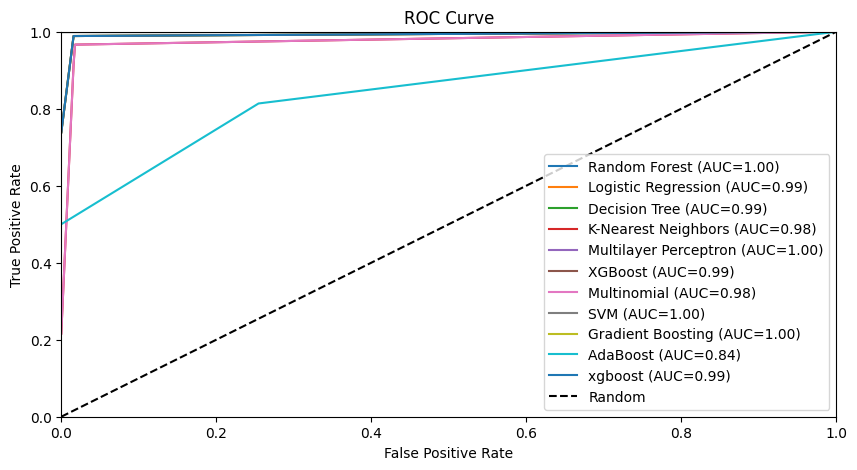

In [67]:
X, y = x, y 

y_binary = label_binarize(y, classes=np.unique(y))

# Create figure for ROC curves
plt.figure(figsize=(10, 5))

# Loop through classifiers and plot ROC curves

classifiers = [(RT_model, 'Random Forest'),
               (logistic_model, 'Logistic Regression'),
               (DT_model, 'Decision Tree'),
               (knn_model, 'K-Nearest Neighbors'),
               (clf, 'Multilayer Perceptron'),
               (xg_model, 'XGBoost'),
               (nb_model,"Multinomial"),
               (svm_model,"SVM"),
               (GB_model,"Gradient Boosting"),
               (AB_model,"AdaBoost"),
               (xg_model,"xgboost")]

for classifier, label in classifiers:
    if hasattr(classifier, 'predict_proba'):
        classifier.fit(X, y)
        y_probs = classifier.predict_proba(X)
    else:
        ovr_classifier = OneVsRestClassifier(classifier)
        ovr_classifier.fit(X, y)
        y_probs = ovr_classifier.decision_function(X)

    if y_probs.ndim > 1 and y_probs.shape[1] > 2:
        # For multiclass classification, y_probs should have shape (n_samples, n_classes)
        # Use label_binarize to convert predicted probabilities into binary matrix representation
        y_binary_probs = label_binarize(np.argmax(y_probs, axis=1), classes=np.arange(y_probs.shape[1]))
        y_probs = y_binary_probs

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(y_binary.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_binary[:, i], y_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr=np.unique(np.concatenate([fpr[i] for i in range(y_binary.shape[1])]))
    mean_tpr=np.zeros_like(all_fpr)
    for i in range(y_binary.shape[1]):
      mean_tpr += np.interp(all_fpr,fpr[i],tpr[i])
    mean_tpr/=y_binary.shape[1]
    roc_auc=auc(all_fpr,mean_tpr)

    plt.plot(all_fpr,mean_tpr,label=f'{label} (AUC={roc_auc:.2f})')

plt.plot([0,1],[0,1],'k--',label="Random")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.legend(loc='lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()